In [1]:
# fixing directory to root of project
import git
import os
import sys

repo = git.Repo(".", search_parent_directories=True)
os.chdir(repo.working_tree_dir)
sys.path.append(repo.working_tree_dir)

import pandas as pd
import numpy as np
from scipy.stats import uniform, loguniform, randint
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

from src.utils.utils import int_loguniform
from src.modelling.pipeline.ml_pipeline import (
    preprocess_features,
    preprocess_target,
    FilterFeatures,
    model_pipeline,
    )


from sklearn.datasets import load_iris


d:\Users\sean.ogara\.conda\envs\auto-ml\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
d:\Users\sean.ogara\.conda\envs\auto-ml\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
iris = load_iris()

iris_data = pd.DataFrame(np.concatenate((iris.data, np.array([iris.target]).T), axis=1), columns=iris.feature_names + ['target'])
iris_data = iris_data[iris_data["target"].isin([2.0, 1.0])]
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1.0
51,6.4,3.2,4.5,1.5,1.0
52,6.9,3.1,4.9,1.5,1.0
53,5.5,2.3,4.0,1.3,1.0
54,6.5,2.8,4.6,1.5,1.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [3]:
# set the pipeline code running with a logistic regression and a decision tree classifier model
# see where it breaks, remove those bits of code temporarily and get the core pipeline working
# build some logic into the broken bits of the code to run differently when a classification task is running, get the code working agian with all bits added back in
# code the classification logic

2025/04/01 12:49:53 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '206df233f15b4b21850a0577194b9f04', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


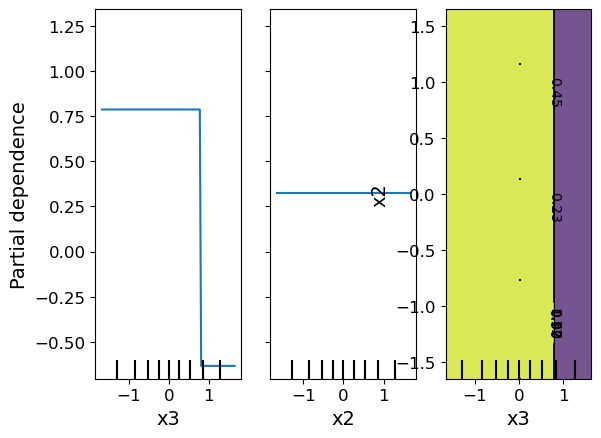

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.datasets import make_hastie_10_2
import matplotlib.pyplot as plt

X, y = make_hastie_10_2(random_state=0)


iris = load_iris()
mc_clf = GradientBoostingClassifier(n_estimators=10,
    max_depth=1).fit(iris.data, iris.target)
features = [3, 2, (3, 2)]
PartialDependenceDisplay.from_estimator(mc_clf, X, features, target=0)
plt.show()

Number of cores available for parallel processing: 4
LogisticRegression


d:\Users\sean.ogara\.conda\envs\auto-ml\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=150. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


2025/04/01 11:29:00 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Users\sean.ogara\.conda\envs\auto-ml\Lib\site-packages\mlflow\sklearn\utils.py:808: UserWarning: Top 50 child runs will be created based on ordering in rank_test_f1_macro column.  You can choose not to limit the number of child runs created by setting `max_tuning_runs=None`."
2025/04/01 11:29:00 INFO mlflow.sklearn.utils: Logging the 50 best runs, no runs will be omitted.


Creating evaluation plots


ValueError: Expected 2D array, got 1D array instead:
array=[2. 2. 2. 2. 2. 1. 1. 2. 1. 1. 2. 1. 2. 1. 2. 1. 1. 2. 2. 1. 1. 2. 2. 2.
 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1. 2. 1. 2. 1. 2. 2. 2. 1. 1. 2.
 1. 1. 2. 1. 1. 2. 2. 1. 1. 1. 2. 2. 1. 1. 2. 1. 1. 1. 2. 2. 2. 1. 2. 1.
 1. 1. 2. 2. 1. 1. 2. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

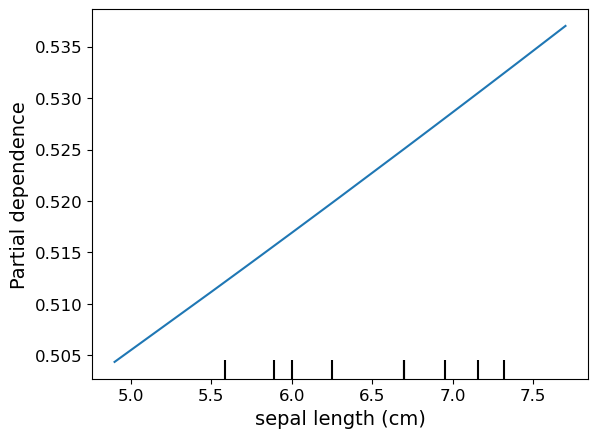

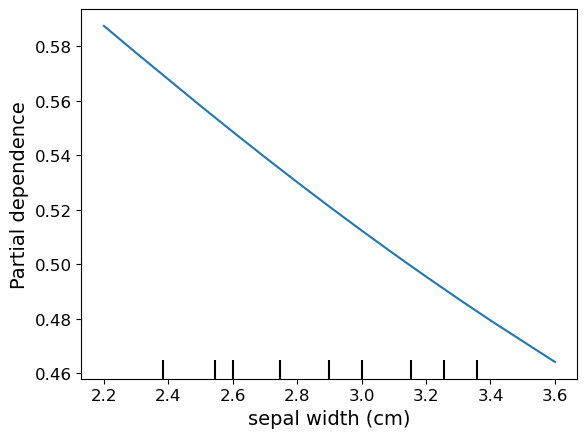

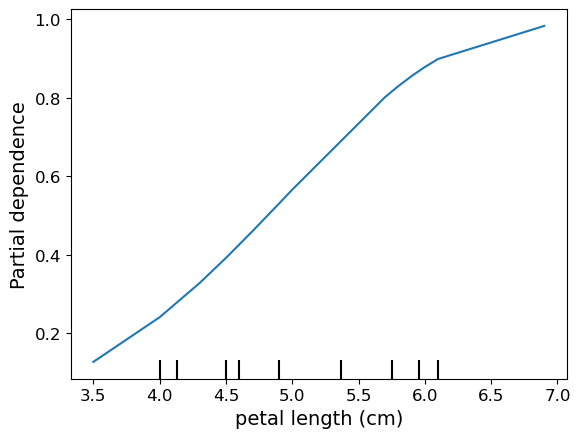

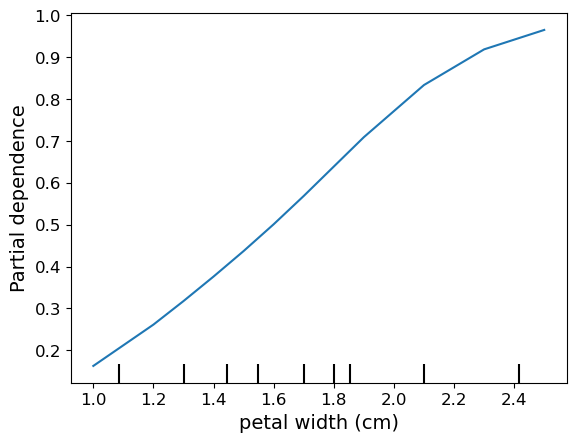

In [4]:
# target variables
target_var_list = ["target"]
# drop any unecessary variables from the model. In this case, we are dropping the geographical identifier.
drop_variables = []
# model dictionary and hyperparameter search space
model_param_dict = {
    LogisticRegression(): {},
    RandomForestClassifier(): {}
}
# optional controls:
# select features list - use to subset specific features of interest, if blank it will use all features.
# change feature_filter__filter_features hyperparam when using this
select_features_list = []
# optional - user specified model for evaluation plots. e.g. user_model = "Lasso"
# if left blank out the best performing model will be used for the evaluation plots
user_model = ""
# shortened feature name label for evaluation plots
col_labels = {}

# run pipeline for all models
for target_var in target_var_list:
    # pre-processing
    # drop cols, convert to set to drop unique cols only
    cols_to_drop = list(set([target_var] + drop_variables))
    features = preprocess_features(df=iris_data, cols_to_drop=cols_to_drop)
    target_df = preprocess_target(df=iris_data, target_col=target_var)

    # run model pipeline
    model_pipeline(
        model_param_dict=model_param_dict,
        target_var=target_var,
        target_df=target_df,
        feature_df=features,
        id_col="",
        original_df=iris_data,
        output_path="outputs",
        output_label="classification_demo",
        col_label_map=col_labels,
        user_evaluation_model=user_model,
    )


In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)